In [1]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
# path =r'C:\Users\623737\Machine_Learning\IPL\Most_Runs_KKR'
# allFiles = glob.glob(path + "/*.csv")
# df_ms_runs = pd.DataFrame()
# list_ = []
# for file_ in allFiles:
#    df = pd.read_csv(file_,index_col=0)
#    team = (file_.rsplit('.csv', 1)[0]).rsplit('_', 1)[1]
#    year = (file_.rsplit('.csv', 1)[0]).rsplit('_', 2)[1]
#    df['team'] = team
#    df['year'] = year
#    list_.append(df) 
# df_ms_runs = pd.concat(list_) 


In [3]:
df_ms_runs = pd.read_csv('df_ms_runs_allteams.csv' , index_col = 0)

In [4]:
df_ms_runs.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,team,year,Standing
0,DJ Bravo,19,16,8,371,48,46.37,264,140.53,0,0,0,20,20,CSK,2012,R
1,F du Plessis,13,12,0,398,73,33.16,304,130.92,0,3,0,29,17,CSK,2012,R


In [5]:
df_ms_runs.isnull().sum()

Player      0
Mat         0
Inns        0
NO          0
Runs        0
HS          0
Ave         0
BF          0
SR          0
100         0
50          0
0           0
4s          0
6s          0
team        0
year        0
Standing    0
dtype: int64

In [6]:
df_ms_runs.dropna(axis = 0,inplace = True)

In [7]:
cols =['Mat','Inns','NO','Runs','100','50','0','4s','6s','BF']
df_ms_runs[cols] = df_ms_runs[cols].astype(int)

In [8]:
df_ms_runs = df_ms_runs.reset_index(drop=True)

In [9]:
df_ms_runs.dtypes

Player       object
Mat           int32
Inns          int32
NO            int32
Runs          int32
HS           object
Ave         float64
BF            int32
SR          float64
100           int32
50            int32
0             int32
4s            int32
6s            int32
team         object
year          int64
Standing     object
dtype: object

In [10]:
#df_ms_runs[['Ave','Player','HS']][df_ms_runs['Ave']=='-']

In [11]:
#replacing Ave = - with Higest Score of that player
#df_ms_runs['Ave'][df_ms_runs['Ave']=='-'] = df_ms_runs['HS'][df_ms_runs['Ave']=='-'].str.rsplit('*', 1).str[0]
#Records with SR = - 
#df_ms_runs[['Ave','Player','SR']][df_ms_runs['SR']=='-']
#replacing SR = - with zero
#df_ms_runs['SR'][df_ms_runs['SR']=='-'] = 0
#df_ms_runs[['Ave','Player','SR']][df_ms_runs['SR']=='-']

In [12]:
#flot_cols = ['Ave','SR']
#df_ms_runs[flot_cols] = df_ms_runs[flot_cols].apply(pd.to_numeric)

# Best Strike rate of a player in a season with atleast 10 Inns in a season

In [13]:
df_ms_runs[df_ms_runs['SR']==max(df_ms_runs[(df_ms_runs['Inns'] > 10)].SR)]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,team,year,Standing
570,AD Russell,13,11,2,326,66,36.22,169,192.89,0,3,0,35,19,KKR,2015,NQ


# Best Average of a player in a season with atleast 10 Inns  in a season

In [14]:
df_ms_runs[(df_ms_runs['Ave']==max(df_ms_runs[(df_ms_runs['Inns'] > 10)].Ave))]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,team,year,Standing
770,V Kohli,16,16,4,973,113,81.08,640,152.03,4,7,1,83,38,RCB,2016,R


# Top 10 Run scorers from 2012 IPL

In [15]:
runs_by_player = df_ms_runs.groupby('Player', as_index=False).agg({"Runs": "sum"})
runs_by_player.sort_values(by = ['Runs'], ascending=[False]).head(10)

,Player,Runs
79,DA Warner,3245
331,V Kohli,3143
28,AM Rahane,2789
290,SK Raina,2727
257,RG Sharma,2665
105,G Gambhir,2657
269,RV Uthappa,2645
275,S Dhawan,2590
67,CH Gayle,2555
14,AB de Villiers,2490


# Runs scored by Players in each seasons

In [16]:
runs_by_player_seasons = df_ms_runs.groupby(['Player','year'], as_index=False).agg({"Runs": "sum"})
runs_by_player_seasons['Runs']=runs_by_player_seasons['Runs'].astype(int)
runs_by_player_seasons.head(5)

,Player,year,Runs
0,A Ashish Reddy,2012,35
1,A Ashish Reddy,2013,125
2,A Ashish Reddy,2015,73
3,A Ashish Reddy,2016,47
4,A Chandila,2012,0


# Higest Run Scored in a season - Top 10 (From 2012)

In [17]:
runs_by_player_seasons.sort_values(by = ['Runs'], ascending=[False]).head(10)

,Player,year,Runs
936,V Kohli,2016,973
215,DA Warner,2016,848
528,MEK Hussey,2013,733
178,CH Gayle,2012,733
179,CH Gayle,2013,708
42,AB de Villiers,2016,687
758,RV Uthappa,2014,660
216,DA Warner,2017,641
933,V Kohli,2013,634
281,G Gambhir,2012,590


# Maximum run scored in a season 

In [18]:
runs_by_player_seasons[runs_by_player_seasons.Runs==max(runs_by_player_seasons['Runs'])]

,Player,year,Runs
936,V Kohli,2016,973


# Gautam Gambhir Performence by Year

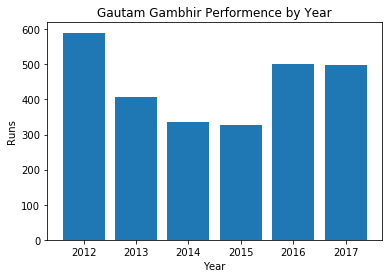

In [19]:
runs = runs_by_player_seasons[runs_by_player_seasons['Player'] == 'G Gambhir']['Runs']
year = runs_by_player_seasons[runs_by_player_seasons['Player'] == 'G Gambhir']['year']
y_pos = np.arange(len(year))
plt.bar(y_pos,runs)
plt.xticks(y_pos,year) 
plt.ylabel('Runs')
plt.xlabel('Year')
plt.title('Gautam Gambhir Performence by Year')
plt.show()

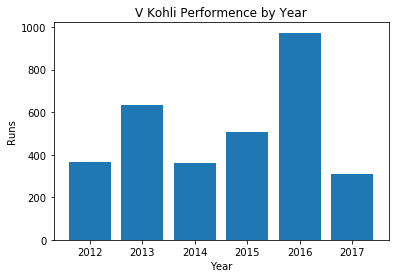

In [20]:
runs = runs_by_player_seasons[runs_by_player_seasons['Player'] == 'V Kohli']['Runs']
year = runs_by_player_seasons[runs_by_player_seasons['Player'] == 'V Kohli']['year']
y_pos = np.arange(len(year))
plt.bar(y_pos,runs)
plt.xticks(y_pos,year) 
plt.ylabel('Runs')
plt.xlabel('Year')
plt.title('V Kohli Performence by Year')
plt.show()

  # Batting Details Per Seaon

In [21]:
batting_by_seasons = df_ms_runs.groupby(['year','team','Standing'], as_index=False).agg({"Runs": "sum","BF": "sum","100":"sum","50":"sum","4s": "sum","6s": "sum"})
batting_by_seasons['Team_Strike_Rate'] = round(((batting_by_seasons['Runs']/batting_by_seasons['BF'])*100),2)
batting_by_seasons['%Runs_In_Boundaries'] = round((((batting_by_seasons['4s']*4+batting_by_seasons['6s']*6)/batting_by_seasons['Runs'])*100),0) 
batting_by_seasons

,year,team,Standing,Runs,BF,100,50,4s,6s,Team_Strike_Rate,%Runs_In_Boundaries
0,2012,CSK,R,2717,2130,1,8,223,102,127.56,55.0
1,2012,DC,NQ,2202,1771,0,13,188,77,124.34,55.0
2,2012,DD,S,2502,1926,2,12,232,97,129.91,60.0
3,2012,KKR,W,2356,1956,0,11,210,69,120.45,53.0
4,2012,KP,NQ,2286,1885,0,8,226,61,121.27,56.0
5,2012,MI,S,2333,1992,1,13,219,79,117.12,58.0
6,2012,PW,NQ,2183,1919,0,5,181,60,113.76,50.0
7,2012,RCB,NQ,2351,1790,1,16,186,117,131.34,62.0
8,2012,RR,NQ,2393,1901,1,10,246,69,125.88,58.0
9,2013,CSK,R,2671,2042,1,16,241,84,130.80,55.0


# Avg no 50s scored by team

In [34]:
print( 'Teams Reached to Finals & Play-offs :') 
print(round(np.mean(batting_by_seasons[(batting_by_seasons['Standing'] == 'W') | (batting_by_seasons['Standing'] == 'R') |(batting_by_seasons['Standing'] == 'S')]['50']),0))
print( 'Teams could not Reached to Finals') 
print(round(np.mean(batting_by_seasons[(batting_by_seasons['Standing'] == 'NQ')]['50']),0))

Teams Reached to Finals & Play-offs :
13.0
Teams could not Reached to Finals
10.0


# %Runs_In_Boundaries is not a factor for teams reaching to Play - Offs

In [33]:
print( 'Teams Reached to Finals & Play-offs :') 
print(round(np.mean(batting_by_seasons[(batting_by_seasons['Standing'] == 'W') | (batting_by_seasons['Standing'] == 'R') |(batting_by_seasons['Standing'] == 'S')]['%Runs_In_Boundaries']),1))
print( 'Teams could not Reached to Finals') 
print(round(np.mean(batting_by_seasons[(batting_by_seasons['Standing'] == 'NQ')]['%Runs_In_Boundaries']),1))

Teams Reached to Finals & Play-offs :
58.5
Teams could not Reached to Finals
57.8


# Team_Strike_Rate Comparison between teams Reaching/Not Reaching Play Offs

In [24]:
print( 'Teams Reached to Finals & Play-offs :') 
print(round(np.mean(batting_by_seasons[(batting_by_seasons['Standing'] == 'W') | (batting_by_seasons['Standing'] == 'R') |(batting_by_seasons['Standing'] == 'S')]['Team_Strike_Rate']),0))
print( 'Teams could not Reached to Finals') 
print(round(np.mean(batting_by_seasons[(batting_by_seasons['Standing'] == 'NQ')]['Team_Strike_Rate']),0))

Teams Reached to Finals & Play-offs :
131.0
Teams could not Reached to Finals
125.0


# Highest Team_Strike_Rates (Top -5) - Only one team went on to win the IPL 

In [25]:
batting_by_seasons.sort_values(by = ['Team_Strike_Rate'], ascending=[False]).head(5)

,year,team,Standing,Runs,BF,100,50,4s,6s,Team_Strike_Rate,%Runs_In_Boundaries
39,2016,RCB,R,2863,1868,5,19,239,142,153.27,63.0
31,2015,RCB,S,2190,1518,2,8,206,105,144.27,66.0
21,2014,KP,R,2824,1980,2,11,262,127,142.63,64.0
43,2017,GL,NQ,2309,1622,0,12,218,92,142.36,62.0
30,2015,MI,W,2611,1885,0,19,242,120,138.51,65.0


# Highest %Runs_In_Boundaries (Top -5) - Only one team went on to win the IPL 

In [26]:
batting_by_seasons.sort_values(by = ['%Runs_In_Boundaries'], ascending=[False]).head(5)

,year,team,Standing,Runs,BF,100,50,4s,6s,Team_Strike_Rate,%Runs_In_Boundaries
31,2015,RCB,S,2190,1518,2,8,206,105,144.27,66.0
30,2015,MI,W,2611,1885,0,19,242,120,138.51,65.0
21,2014,KP,R,2824,1980,2,11,262,127,142.63,64.0
39,2016,RCB,R,2863,1868,5,19,239,142,153.27,63.0
15,2013,RCB,NQ,2430,1819,1,14,229,104,133.59,63.0


# Batting Stats When Teams are in the Finals

In [27]:
batting_teams_in_final = batting_by_seasons[(batting_by_seasons['Standing']=='W') | (batting_by_seasons['Standing']=='R')]
batting_teams_in_final

,year,team,Standing,Runs,BF,100,50,4s,6s,Team_Strike_Rate,%Runs_In_Boundaries
0,2012,CSK,R,2717,2130,1,8,223,102,127.56,55.0
3,2012,KKR,W,2356,1956,0,11,210,69,120.45,53.0
9,2013,CSK,R,2671,2042,1,16,241,84,130.80,55.0
13,2013,MI,W,2845,2254,0,15,252,117,126.22,60.0
20,2014,KKR,W,2372,1820,0,13,223,76,130.33,57.0
21,2014,KP,R,2824,1980,2,11,262,127,142.63,64.0
26,2015,CSK,R,2564,2005,1,10,249,96,127.88,61.0
30,2015,MI,W,2611,1885,0,19,242,120,138.51,65.0
39,2016,RCB,R,2863,1868,5,19,239,142,153.27,63.0
41,2016,SRH,W,2549,1977,0,15,231,89,128.93,57.0


# Average Team_Strike_Rate for Teams in Finals 

In [28]:
print(np.mean(batting_teams_in_final.Team_Strike_Rate))

133.17285714285714


# Average %Runs_In_Boundaries for Teams in Finals

In [29]:
print(np.mean(batting_teams_in_final['%Runs_In_Boundaries']))

58.92857142857143
